In [33]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplot

# some "fun" packages
from wordcloud import WordCloud
import emoji

import re
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from afinn import Afinn

from newspaper import Article
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer, WordPunctTokenizer, TweetTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
SQL = """SELECT * from `questrom.datasets.airline-intents` where intent in ('atis_airfare', 
'atis_ground_service', 
'atis_airline', 
'atis_abbreviation')"""
YOUR_BILLING_PROJECT = "ba820-329602"
airlines = pd.read_gbq(SQL, YOUR_BILLING_PROJECT)

In [10]:
airlines.sample(2)

,intent,text
529,atis_airline,which airlines go from san francisco to washi...
776,atis_ground_service,what ground transportation is available at de...


In [23]:
tfidf = TfidfVectorizer()
idf = tfidf.fit_transform(airlines['text'])
idf = pd.DataFrame(idf.toarray(), columns=tfidf.get_feature_names_out())
idf

,1000,1039,106,1291,139,1700,19,1991,1993,200,...,who,will,with,worth,would,yn,york,you,your,yyz
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.426846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
978,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
979,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
980,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# load umap
from umap import UMAP
u = UMAP(random_state=820)
embeds = u.fit_transform(idf)
embeds.shape
umap_df = pd.DataFrame(embeds, columns=['e1', 'e2'])
umap_df['y'] = airlines['intent']
umap_df.head(3)

,e1,e2,y
0,10.695443,4.590717,atis_airfare
1,19.005787,-0.966345,atis_airfare
2,10.055819,5.727744,atis_airfare


<AxesSubplot:xlabel='e1', ylabel='e2'>

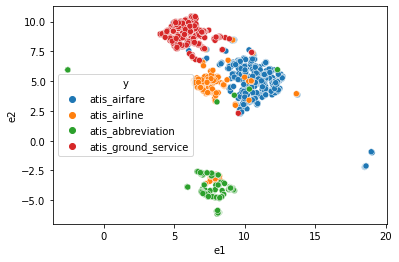

In [31]:
sns.scatterplot(x="e1", y="e2", hue="y", data=umap_df, legend="full")

In [34]:
corpus = ['I want my MTV! www.mtv.com', "Can't I have it all for $5.00 @customerservice #help"]

In [35]:
social = TweetTokenizer()

tokens_social = []
for doc in corpus:
  tokens_social.append(social.tokenize(doc))


# what do we have
tokens_social

[['I', 'want', 'my', 'MTV', '!', 'www.mtv.com'],
 ["Can't",
  'I',
  'have',
  'it',
  'all',
  'for',
  '$',
  '5.00',
  '@customerservice',
  '#help']]

In [37]:
afinn = Afinn()
print(afinn.score("Today is a great day"))
print(afinn.score("Today is a horrible day"))



3.0
-3.0


In [38]:
# let's look at the data behind this
URL = "https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-111.txt"
ad = pd.read_csv(URL, sep='\t', header=None, names=['token', 'score'])
ad.head(4)

,token,score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2


In [39]:
ad.describe()

,score
count,2477.000000
mean,-0.589423
std,2.123931
min,-5.000000
25%,-2.000000
50%,-2.000000
75%,2.000000
max,5.000000


C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

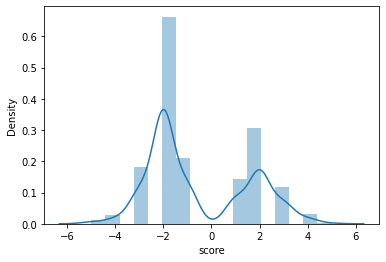

In [41]:
sns.distplot(ad.score)

In [42]:
ROWS = ad.token.str.contains("stop")
ad.loc[ROWS, :]

,token,score
2125,stop,-1
2126,stopped,-1
2127,stopping,-1
2128,stops,-1
2336,unstoppable,2


In [43]:
ROWS = ad.token.str.contains("lol")
ad.loc[ROWS, :]

,token,score
1455,lol,3
1940,rotflol,4


In [44]:
afinn.score("love hate")

0.0

In [49]:
afinn.scores("love hate")

[3, -3]

In [80]:
SQL = """SELECT * from `questrom.datasets.bruins_twitter` where hour in (0,1,2,3)"""
YOUR_BILLING_PROJECT = "ba820-329602"
tw_bruins = pd.read_gbq(SQL, YOUR_BILLING_PROJECT)

In [81]:
tw_bruins

,status_id,created_at,text,source,hour,minute,day
0,1204192788650373120,2019-12-10T00:15:08Z,#BOS@#OTT starting soon!\n\nHottest players ba...,Player Fan Bot,0,15,10
1,1204193007072923648,2019-12-10T00:16:00Z,bdnsishduroa. there is NEVER enough bergy cont...,Talon (Plus),0,16,10
2,1204194339087364097,2019-12-10T00:21:17Z,#mhsbot today's predictions updated by roster ...,cli-uploader-tool,0,21,10
3,1204196047372902400,2019-12-10T00:28:05Z,#NHLBruins #GoSensGo get refs O'Halloran and S...,Postcron App,0,28,10
4,1204199047856377856,2019-12-10T00:40:00Z,Yeah! #Nantucket\nBoston Celtics \nLET'S GO CE...,Instagram,0,40,10
...,...,...,...,...,...,...,...
6201,1206028151593287686,2019-12-15T01:48:12Z,There's a new top three.\n\nPatrice Bergeron i...,Twitter for Android,1,48,15
6202,1206031364040081408,2019-12-15T02:00:58Z,There's a new top three.\n\nPatrice Bergeron i...,Twitter for Android,2,0,15
6203,1206043109345218560,2019-12-15T02:47:39Z,There's a new top three.\n\nPatrice Bergeron i...,Twitter for Android,2,47,15
6204,1206054494397698049,2019-12-15T03:32:53Z,There's a new top three.\n\nPatrice Bergeron i...,Twitter for Android,3,32,15


In [82]:
tw_bruins
tw_bruins['score'] = tw_bruins['text'].apply(lambda x: afinn.score(x))

In [83]:
tw_bruins = tw_bruins.sort_values(by='status_id')
tw_bruins

,status_id,created_at,text,source,hour,minute,day,score
137,1204188981598019589,2019-12-10T00:00:00Z,#NHLBruins have won 10 straight games when fac...,TweetDeck,0,0,10,12.0
344,1204189271667740673,2019-12-10T00:01:09Z,"In their last 5 games, the Bruins are 1/13 ( 7...",Twitter Web App,0,1,10,5.0
1529,1204189755266744320,2019-12-10T00:03:05Z,"Twelve teams viewing #Sens #Bruins - ANA, ARI,...",Twitter for iPhone,0,3,10,4.0
5120,1204189804692459520,2019-12-10T00:03:16Z,To the rink.\n\n#NHLBruins https://t.co/M1v6rM...,Twitter for iPhone,0,3,10,0.0
5159,1204189854403350532,2019-12-10T00:03:28Z,To the rink.\n\n#NHLBruins https://t.co/M1v6rM...,Twitter for Android,0,3,10,0.0
...,...,...,...,...,...,...,...,...
4015,1206785080540225536,2019-12-17T03:55:58Z,(Updated) Fewest standings points lost:\n#isle...,Twitter for iPhone,3,55,17,-9.0
4016,1206785335121862657,2019-12-17T03:56:59Z,there is nothing I don’t love about this video,Twitter for iPhone,3,56,17,3.0
1384,1206785426461282306,2019-12-17T03:57:21Z,(Updated) Fewest standings points lost:\n#isle...,Twitter Web App,3,57,17,-9.0
1385,1206785499643465729,2019-12-17T03:57:38Z,Fewest standings points lost:\n#isles 16\n#ALL...,Twitter Web App,3,57,17,-6.0


In [84]:
tw_bruins['created_at'] = pd.to_datetime(tw_bruins['created_at'])

In [85]:
tw_bruins = tw_bruins.sort_values(by='created_at')

<AxesSubplot:xlabel='created_at', ylabel='score'>

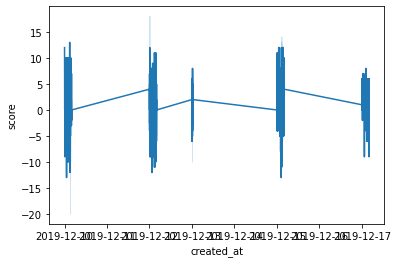

In [86]:
sns.lineplot(x = 'created_at', y = 'score', data = tw_bruins)

In [72]:
mean_by_hour = tw_bruins.groupby(['hour']).mean()
mean_by_hour = mean_by_hour.reset_index()
mean_by_hour[['score', 'hour']]

,score,hour
0,0.411304,0
1,0.039356,1
2,0.739606,2
3,1.213287,3


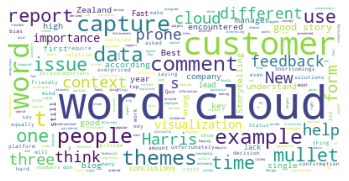

In [87]:
URL = "https://getthematic.com/insights/word-clouds-harm-insights/"
article = Article(URL)
article.download()
article.parse()

wc = WordCloud(background_color="white")
wordcloud = wc.generate(article.text)

# Display the  plot:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [88]:
import spacy
from spacy import cli
from spacytextblob.spacytextblob import SpacyTextBlob

cli.download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [89]:
corpus = ['Today was a great day', 'Today was a horrible day']
docs = list(nlp.pipe(corpus))

In [92]:
doc = docs[0]
type(doc)

spacy.tokens.doc.Doc

In [95]:
doc._.polarity

0.8

In [96]:
doc._.subjectivity

0.75

In [97]:
nlp("great")._.polarity

0.8